1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [1]:


import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)  
Y = pd.DataFrame(boston.target, columns=['MEDV']) 
bos = pd.concat([X, Y], axis=1)

In [2]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
cols = bos.columns.tolist()
for col in cols:
    print(col, ':', len(bos[col].unique()))

print(f"Unique values in CHAS column is: {bos['CHAS'].unique()}")

CRIM : 504
ZN : 26
INDUS : 76
CHAS : 2
NOX : 81
RM : 446
AGE : 356
DIS : 412
RAD : 9
TAX : 66
PTRATIO : 46
B : 357
LSTAT : 455
MEDV : 229
Unique values in CHAS column is: [0. 1.]


As we can see above CHAS column is a categorical column as it only contains 2 unique values and it is already handled so no need to do anything here

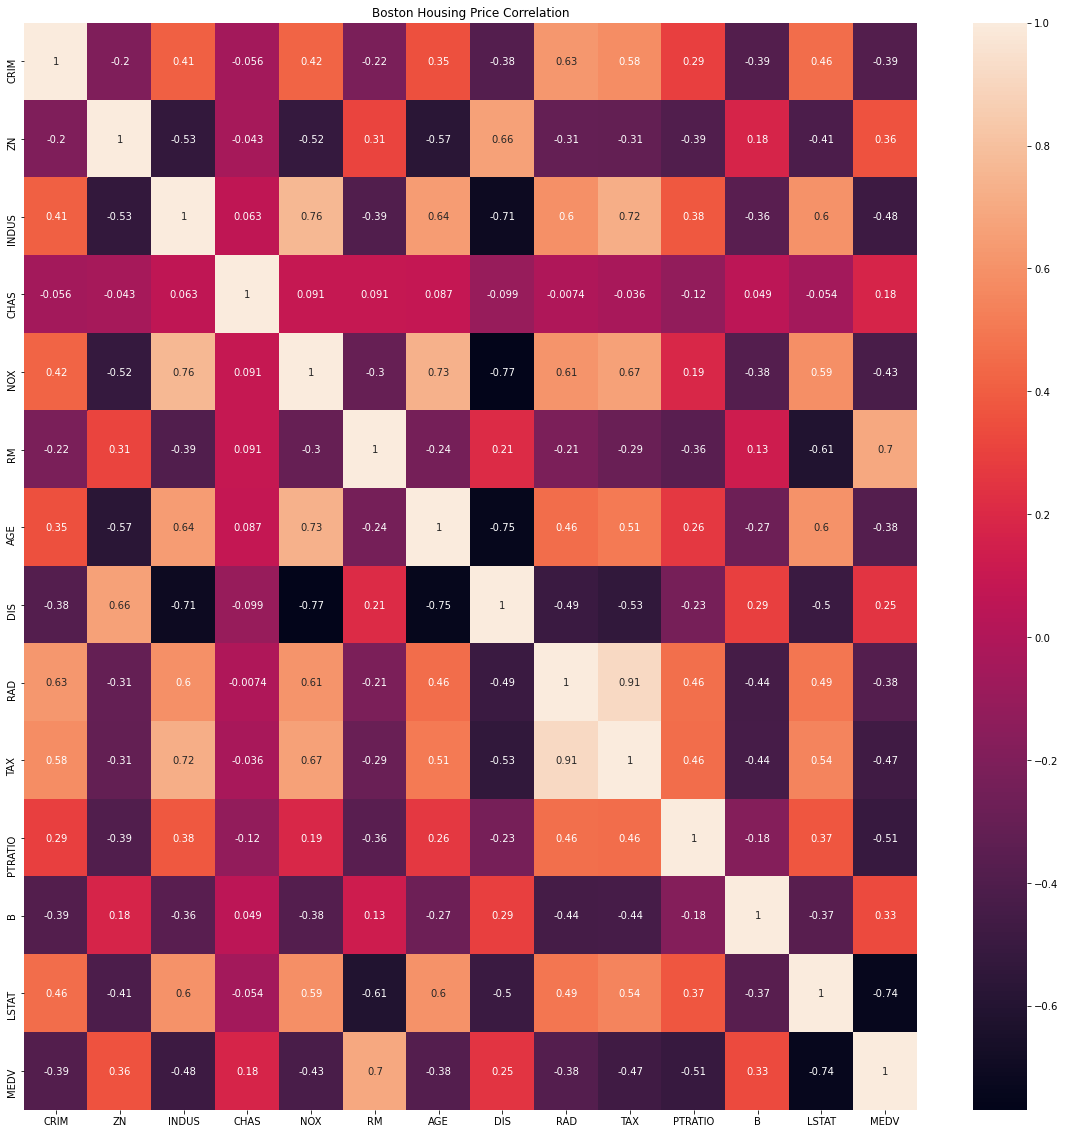

In [5]:
#finding correlation and storing correlation values in a dataframe
corr = bos.corr()


# plotting heatmap of correlation values
plt.figure(figsize=(20,20))
plt.title('Boston Housing Price Correlation')
sns.heatmap(bos.corr(), annot=True)
plt.savefig('EDA\\Boston_corr.jpeg',bbox_inches='tight')
plt.show()


From the plot we can see that LSTAT HAVE HIGHLY NEGATIVE CORRELATION WITH TARGET VALUE MEDV.
From the plot we can see that RM HAVE HIGHLY POSITIVE CORRELATION WITH TARGET VALUE MEDV.
From the plot we can see that LSTAT HAVE NEGATIVE CORRELATION WITH TARGET VALUE MEDV
From the plot we can see that TAX IS HIGHLY CORRELATED WITH RAD (so we can drop any one feature from this.)

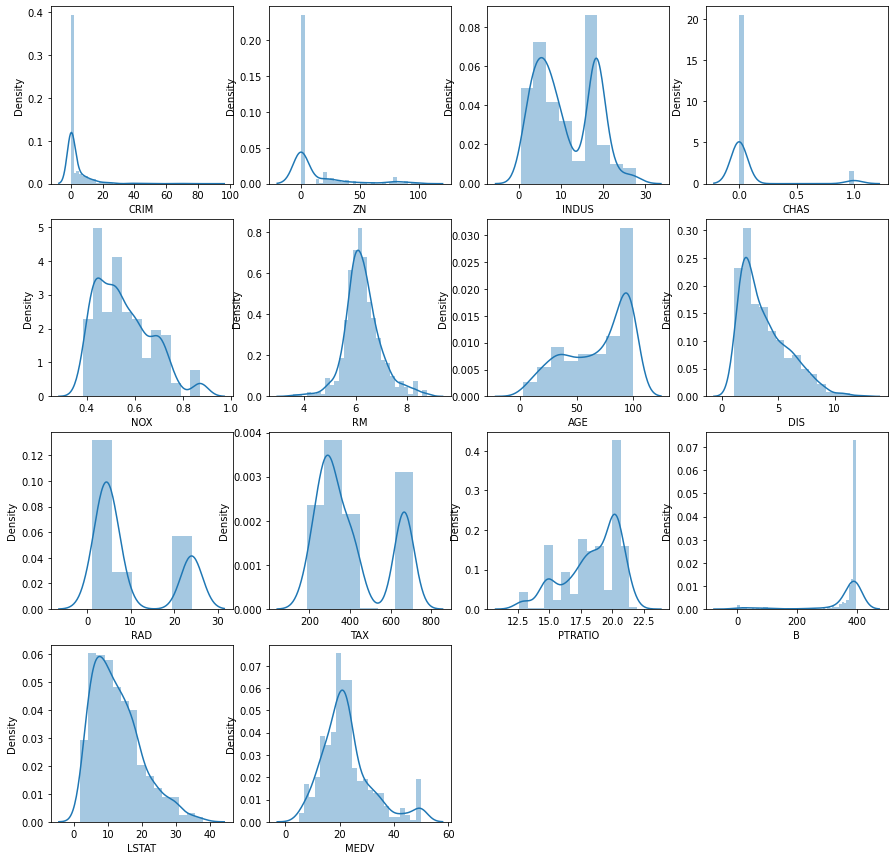

In [6]:
#Density Plot
plt.figure(figsize=(15,15))
plt.title('Boston Housing Price Density Plot')
for i, column in enumerate(bos.columns, 1):
    plt.subplot(4,4,i)
    sns.distplot(bos[column])
plt.savefig('EDA\\Boston_density.jpeg',bbox_inches='tight')


From the above plot we can see that the data distribution is highly scattered in B, CRIM, and ZN column so we need to reduce that lets cross check it by regplot

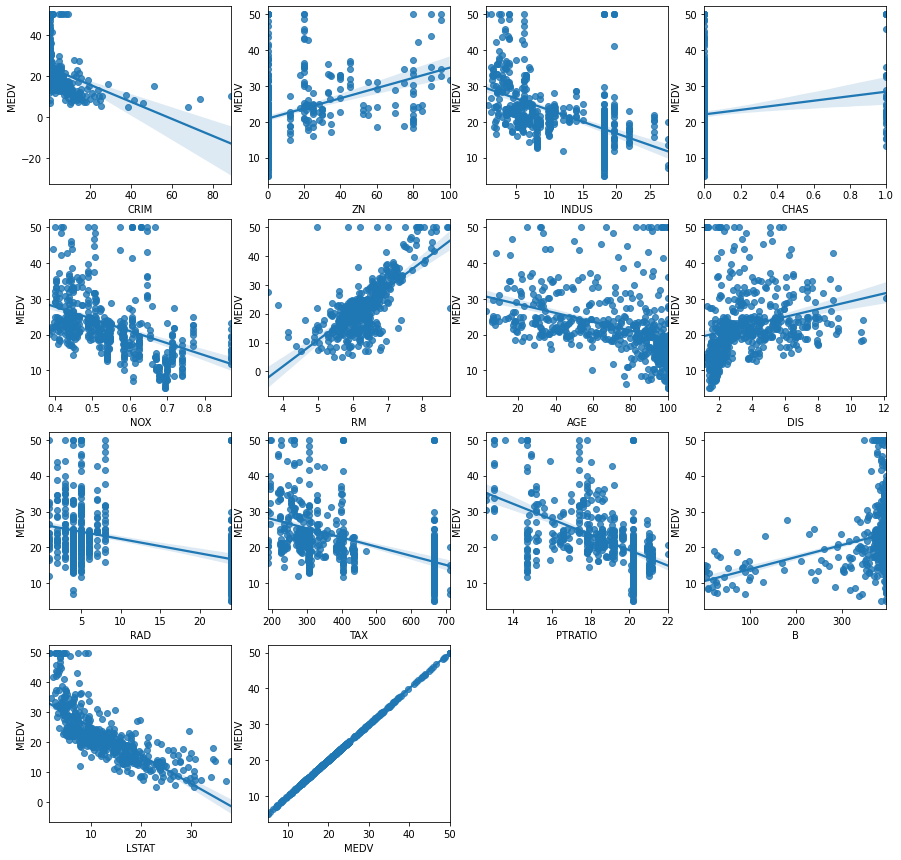

In [7]:
#REGPLOT
plt.figure(figsize=(15,15))
plt.title('Boston Housing Price Regplot')
for i, column in enumerate(bos.columns, 1):
    plt.subplot(4,4,i)
    sns.regplot(x=bos[column], y=bos['MEDV'])
plt.savefig('EDA\\Boston_regplot.jpeg',bbox_inches='tight')

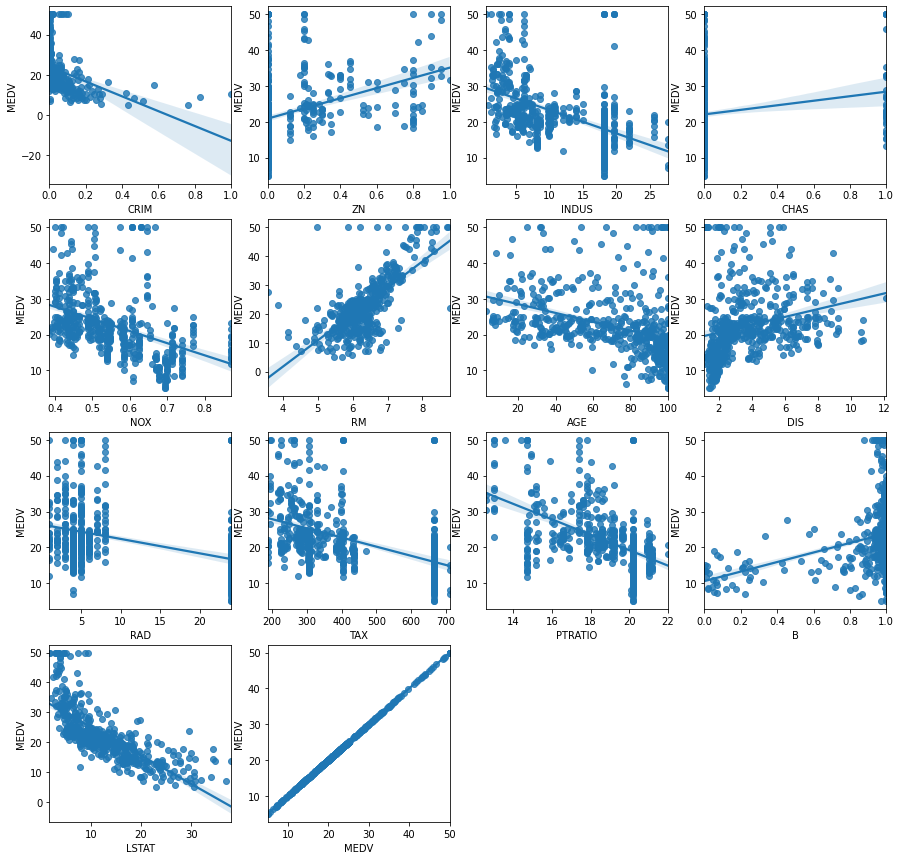

In [8]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
bos[['B','ZN','CRIM']] = minmax.fit_transform(bos[['B','ZN','CRIM']])
plt.figure(figsize=(15,15))
plt.title('Boston Housing Price Regplot')
for i, column in enumerate(bos.columns, 1):
    plt.subplot(4,4,i)
    sns.regplot(x=bos[column], y=bos['MEDV'])
plt.savefig('EDA\\Boston_regplot_after_Minmax.jpeg',bbox_inches='tight')


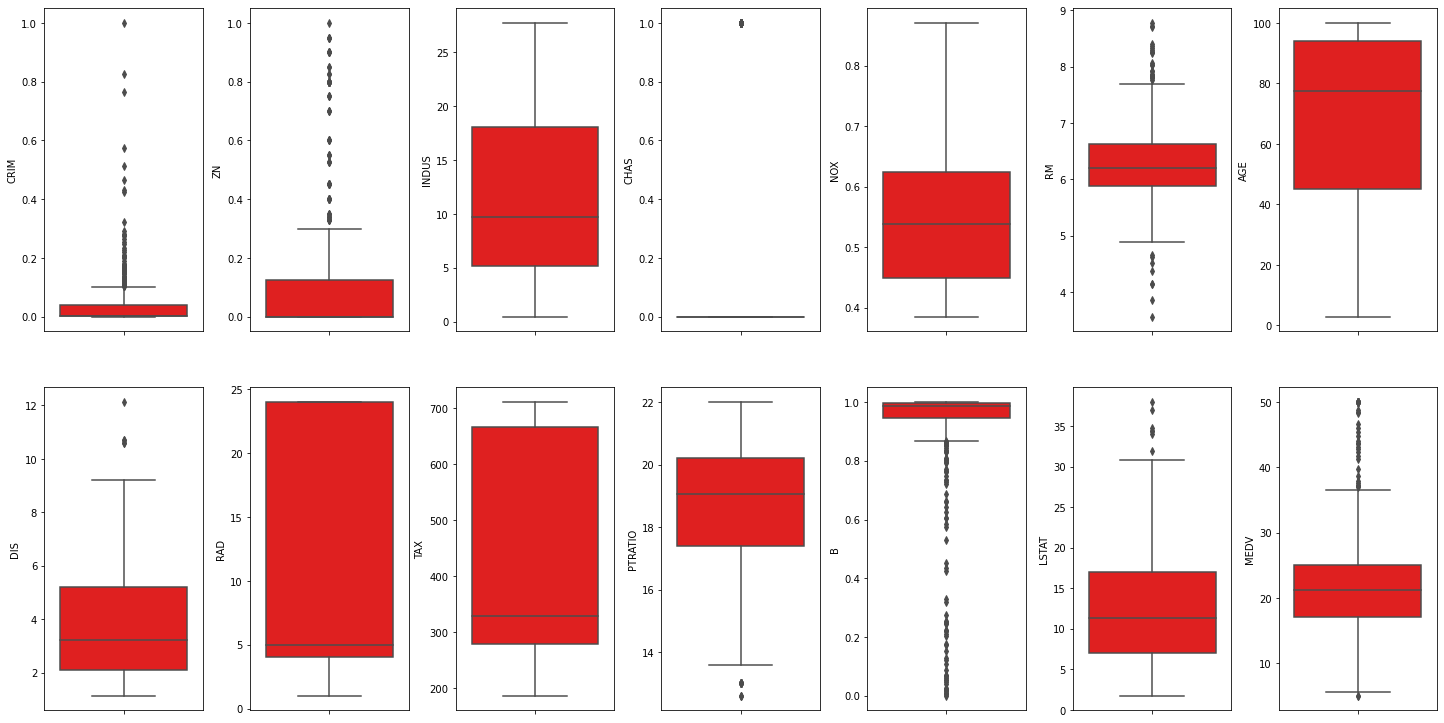

In [9]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in bos.items():
    sns.boxplot(y=col, data=bos, ax=ax[index],color='red')
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.savefig('EDA\\Boston_boxplot.jpeg',bbox_inches='tight')

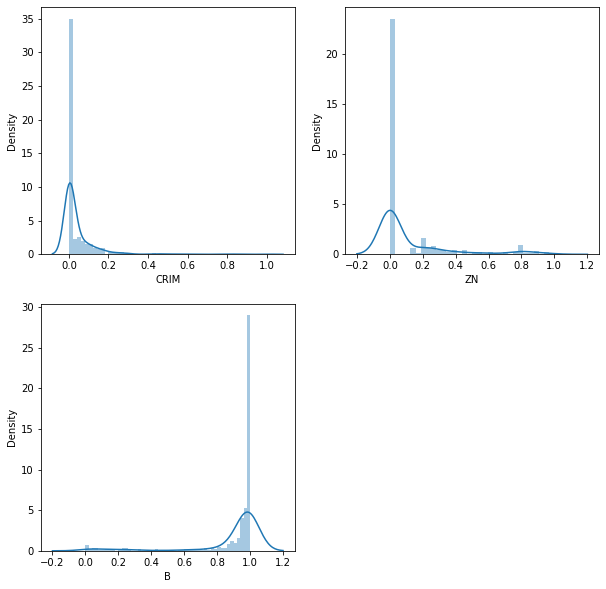

In [10]:
plt.figure(figsize=(10,10))
plt.title('Boston Housing Price Density Plot')
for i, column in enumerate(bos[['CRIM','ZN','B']], 1):
    plt.subplot(2,2,i)
    sns.distplot(bos[column])

So as we know these three features are skewed to handle this we can apply log transformation on this

            B      CRIM        ZN
0    0.693147  0.000000  0.165514
1    0.693147  0.000236  0.000000
2    0.688003  0.000236  0.000000
3    0.690281  0.000293  0.000000
4    0.693147  0.000705  0.000000
..        ...       ...       ...
501  0.686938  0.000633  0.000000
502  0.693147  0.000438  0.000000
503  0.693147  0.000612  0.000000
504  0.688788  0.001160  0.000000
505  0.693147  0.000462  0.000000

[506 rows x 3 columns]


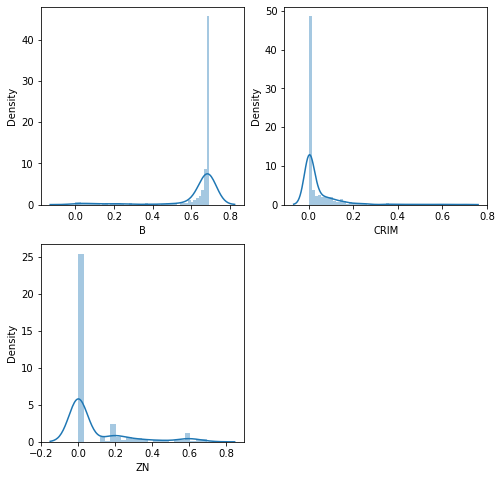

In [11]:
col_lst = ['B','CRIM','ZN']


for i in col_lst:
    
    bos[i] = bos[i].apply(lambda x: np.log(x+1))
print(bos[['B','CRIM','ZN']])
#Density Plot
plt.figure(figsize=(8,8))
plt.title('Boston Housing Price Density Plot')
for i, column in enumerate(bos[col_lst], 1):
    plt.subplot(2,2,i)
    sns.distplot(bos[column])

So after applying log transformation it doesnt have much difference but it will make situation less complex for machines

In [12]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,0.693147,4.98,24.0
1,0.000236,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,0.693147,9.14,21.6
2,0.000236,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,0.688003,4.03,34.7
3,0.000293,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,0.690281,2.94,33.4
4,0.000705,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,0.693147,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,0.686938,9.67,22.4
502,0.000438,0.000000,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,0.693147,9.08,20.6
503,0.000612,0.000000,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,0.693147,5.64,23.9
504,0.001160,0.000000,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,0.688788,6.48,22.0


In [13]:
cols_to_transform = bos.columns.tolist()
#cols_to_transform.pop('MEDV','CHAS')
cols_to_transform.remove('MEDV')
cols_to_transform.remove('CHAS')
cols_to_transform

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bos[cols_to_transform] = scaler.fit_transform(bos[cols_to_transform])
bos


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.467815,0.427865,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.408414,-1.075562,24.0
1,-0.464781,-0.513632,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.408414,-0.492439,21.6
2,-0.464783,-0.513632,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.374488,-1.208727,34.7
3,-0.464049,-0.513632,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.389513,-1.361517,33.4
4,-0.458748,-0.513632,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.408414,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.459675,-0.513632,0.115738,0.0,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.367464,-0.418147,22.4
502,-0.462184,-0.513632,0.115738,0.0,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.408414,-0.500850,20.6
503,-0.459946,-0.513632,0.115738,0.0,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.408414,-0.983048,23.9
504,-0.452891,-0.513632,0.115738,0.0,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.379667,-0.865302,22.0


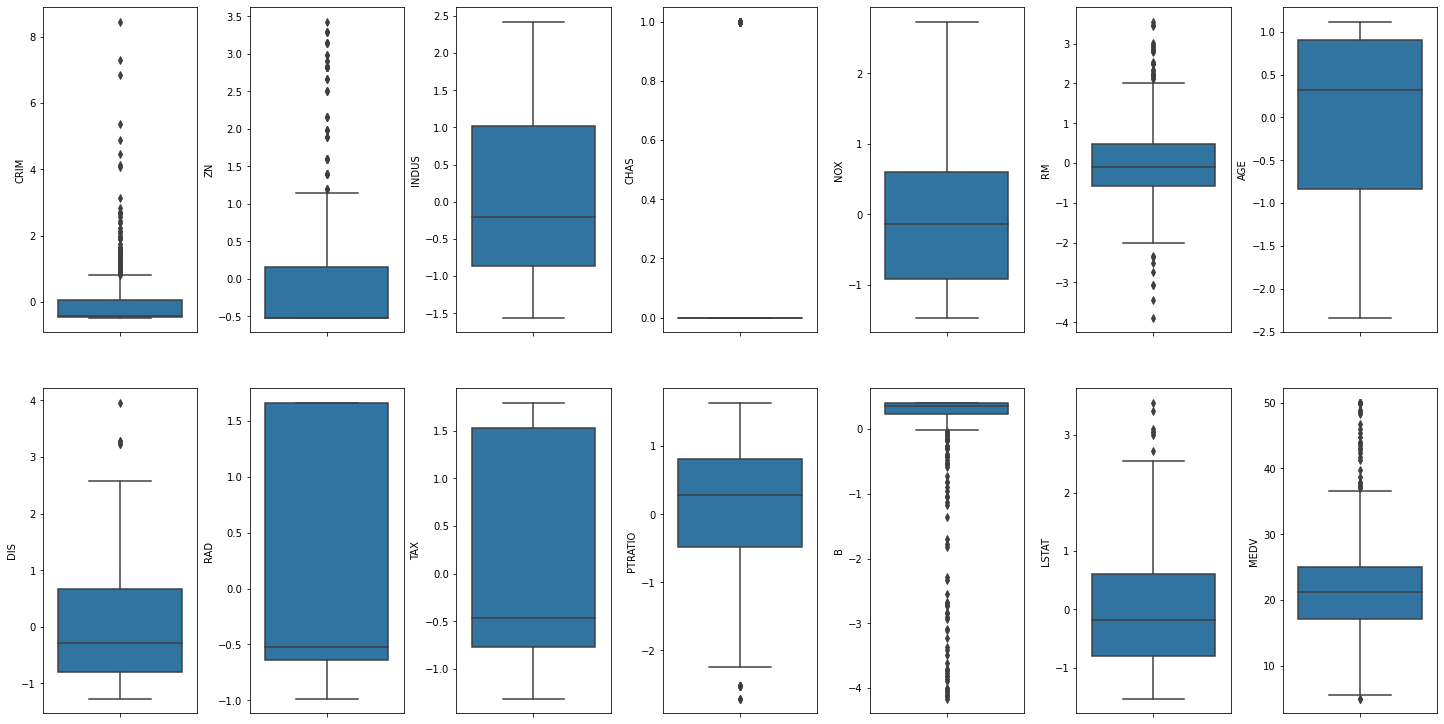

In [15]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in bos.items():
    sns.boxplot(y=col, data=bos, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.savefig('EDA\\Boston_boxplot_after_StandardScaler.jpeg',bbox_inches='tight')

In [16]:
def plotGraph(y_test,y_pred_test,regressorName):
    plt.figure(figsize = (10, 10))
    plt.scatter(y_test, y_pred_test, c = 'crimson')
    plt.yscale('log')
    plt.xscale('log')

    p1 = max(max(y_pred_test), max(y_test))
    p2 = min(min(y_pred_test), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize = 15)
    plt.ylabel('Predictions', fontsize = 15)
    plt.axis('equal')
    plt.savefig(f'EDA\\Boston_regression_prediction_plot_{regressorName}.jpeg',bbox_inches='tight')
    plt.show()

In [17]:
#cross validation
from sklearn.model_selection import cross_val_score

def model_builder(model_object, x_train, x_test, y_train, y_test):
   model = model_object
   model.fit(x_train, y_train)
   cv = cross_val_score(model, x_train, y_train, cv=5)
   y_pred_train = model.predict(x_train)
   y_pred_test = model.predict(x_test)
   r2_train_score = model.score(x_train, y_train)
   r2_test_score = model.score(x_test, y_test)
   mse_train = mean_squared_error(y_train, y_pred_train)
   mse_test = mean_squared_error(y_test, y_pred_test)
   print("CV: ", cv.mean())
   print('R2_score (train): ', r2_train_score)
   print('R2_score (test): ', r2_test_score)
   print("MSE (train): ", mse_train)
   print("MSE (test): ", mse_test)
   plotGraph(y_test,y_pred_test,model.__class__.__name__)
   return model, model.__class__.__name__, mse_test, r2_train_score
    

Important Imports and train_test_splits

In [18]:
X = bos.drop('MEDV', axis=1)
Y = bos['MEDV']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

scores = dict()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Linear Regression

CV:  0.7247504341214743
R2_score (train):  0.7507505550136887
R2_score (test):  0.6671680020294157
MSE (train):  21.653147689436356
MSE (test):  24.407829567991882


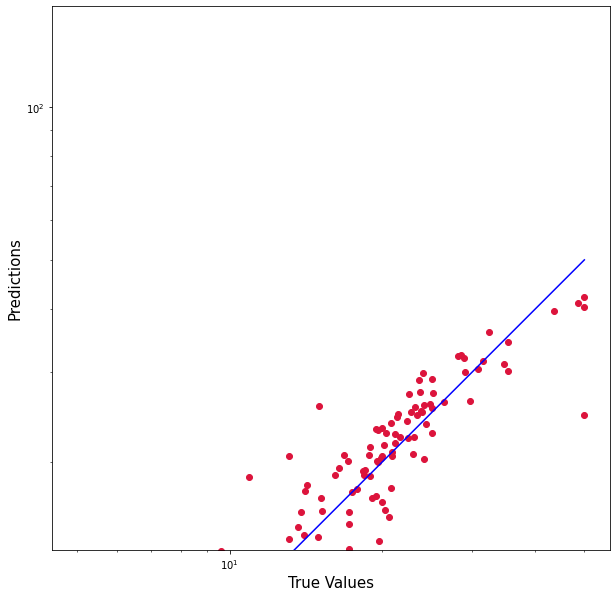

{'LinearRegression': (24.407829567991882, 0.7507505550136887)}

In [19]:
lr = LinearRegression()
model_lr, model_name ,model_lr_mse, model_lr_r2 = model_builder(lr, x_train, x_test, y_train, y_test)
scores[model_name] = model_lr_mse, model_lr_r2
scores

CV:  0.6733615499329001
R2_score (train):  0.8882016055749843
R2_score (test):  0.8552291728283749
MSE (train):  9.712307066760658
MSE (test):  10.616592447744546


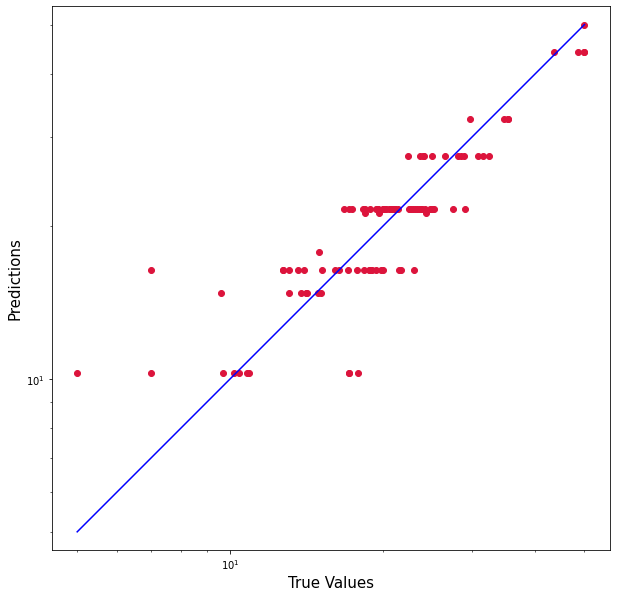

In [20]:
dtc = DecisionTreeRegressor(criterion='mse', splitter='best' ,max_depth=4)
model_dtc, model_name, model_dtc_mse, model_dtc_r2 = model_builder(dtc, x_train, x_test, y_train, y_test)
scores[model_name] = model_dtc_mse, model_dtc_r2

CV:  0.8037458654195735
R2_score (train):  0.9091281734456665
R2_score (test):  0.8451712082919834
MSE (train):  7.894344885293082
MSE (test):  11.354181038090493


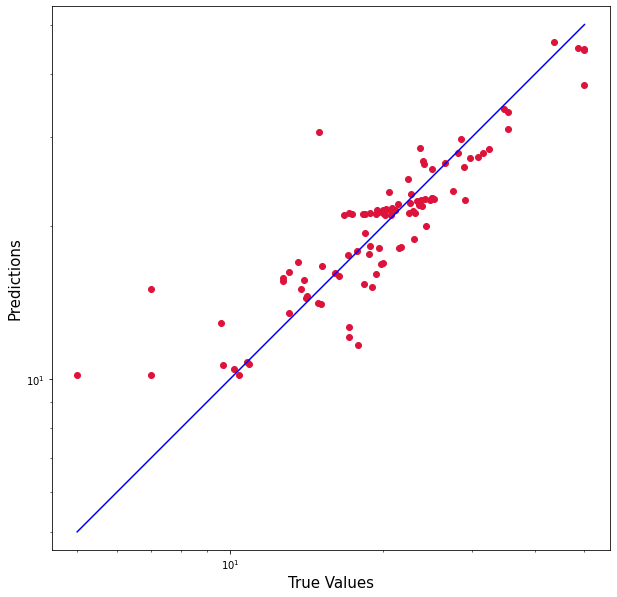

In [21]:
rfc = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=4)
model_rfc, model_name, model_rfc_mse, model_rfc_r2 = model_builder(rfc, x_train, x_test, y_train, y_test)
scores[model_name] = model_rfc_mse, model_rfc_r2

XGB Regressor

CV:  0.8426826203772333
R2_score (train):  0.9722482557392687
R2_score (test):  0.8971971178253524
MSE (train):  2.4108884862314808
MSE (test):  7.538924269651837


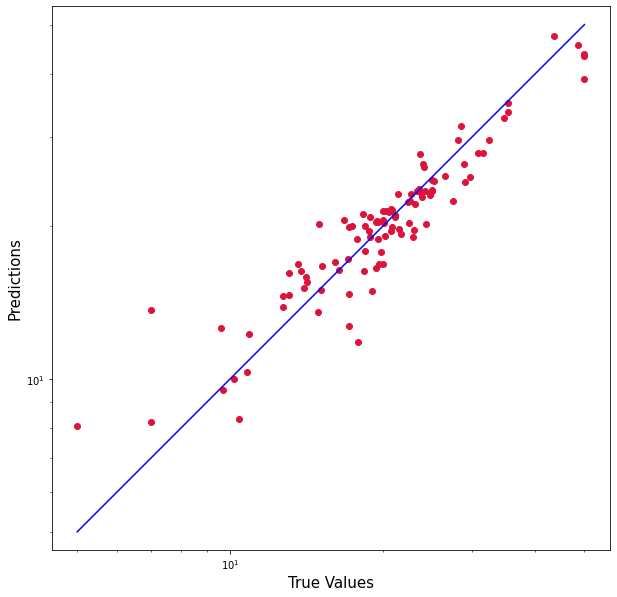

In [22]:
xgb = XGBRegressor(max_depth=4, learning_rate=0.05, n_estimators=100)
model, model_name, model_xgb_mse,  model_xgb_r2 = model_builder(xgb, x_train, x_test, y_train, y_test)
scores[model_name] = model_xgb_mse,model_xgb_r2

In [23]:
def find_best_model(all_model_mse_scores):
    best_model = min(all_model_mse_scores, key=all_model_mse_scores.get)
    best_mse = all_model_mse_scores[best_model]
    best_r2 = all_model_mse_scores[best_model][1]
    print('Best model: ', best_model)
    print('Best MSE: ', best_mse)
    print('Best R2: ', best_r2)
    return best_model,best_mse,best_r2

In [24]:
best_model,best_mse,best_r2 = find_best_model(scores)

Best model:  XGBRegressor
Best MSE:  (7.538924269651837, 0.9722482557392687)
Best R2:  0.9722482557392687


In [28]:
x_test.iloc[0][x_test.columns]

CRIM      -0.455463
ZN        -0.513632
INDUS     -1.034027
CHAS       0.000000
NOX       -0.386091
RM         0.187151
AGE        0.552081
DIS       -0.546077
RAD       -0.523001
TAX       -0.666608
PTRATIO   -0.857929
B          0.396763
LSTAT     -0.506457
Name: 173, dtype: float64

In [30]:
x_test.to_csv('EDA\\Boston_test_data.csv',index=False)